<a href="https://colab.research.google.com/github/SethuSA/CMP7005-Programming-for-data-analysis/blob/main/CMP7000_Final_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Colab/Final assessment CMP 7000'

/content/drive/MyDrive/Colab/Final assessment CMP 7000


In [3]:
%ls

FuelConsumption.csv


In [4]:
import pandas as pd

df = pd.read_csv("FuelConsumption.csv")

df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


The dataset used in this study is the Fuel Consumption dataset, which contains information on vehicle characteristics such as engine size, number of cylinders, fuel consumption, and CO₂ emissions. This dataset was obtained from a reliable public data source and is suitable for business-related analysis within the automotive sector.

The dataset was selected because it presents real-world challenges including potential outliers, variations across vehicle types, and the need for data preprocessing before meaningful analysis can be performed. Analysing this dataset allows exploration of relationships between engine characteristics, fuel efficiency, and environmental impact, which is valuable for business decision-making in vehicle manufacturing and sustainability planning

Task 1 part 2

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


An initial inspection of the dataset shows that it contains 1067 observations and 13 variables, including both numerical and categorical attributes. The numerical variables relate to engine size, fuel consumption, and CO₂ emissions, while categorical variables describe vehicle characteristics such as make, model, fuel type, and transmission.

Although no missing values were identified, further preprocessing is still required to check for outliers, inconsistencies, and extreme values that may affect the reliability of the analysis.

In [6]:
df.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Descriptive statistical analysis was conducted to understand the distribution of numerical variables in the dataset. The results indicate substantial variability in engine size, fuel consumption, and CO₂ emissions, reflecting differences across vehicle classes. While no missing values were observed, extreme values were identified in variables such as engine size and CO₂ emissions, which may represent high-performance or less fuel-efficient vehicles. These values were retained for analysis as they provide useful insights into real-world vehicle efficiency differences.

###Visualisation

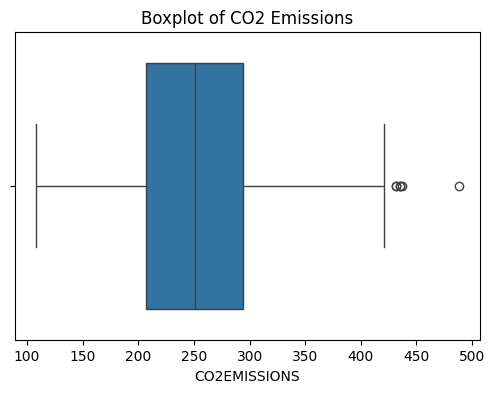

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=df['CO2EMISSIONS'])
plt.title("Boxplot of CO2 Emissions")
plt.show()


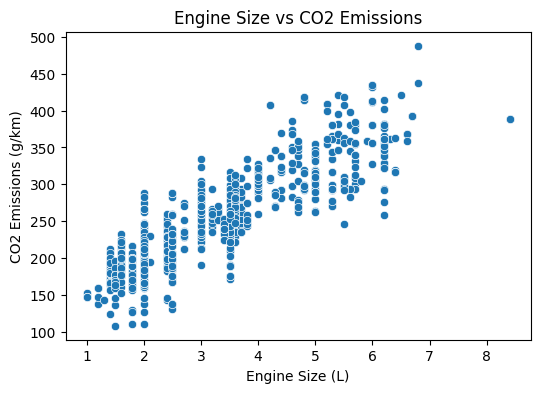

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df)
plt.title("Engine Size vs CO2 Emissions")
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()


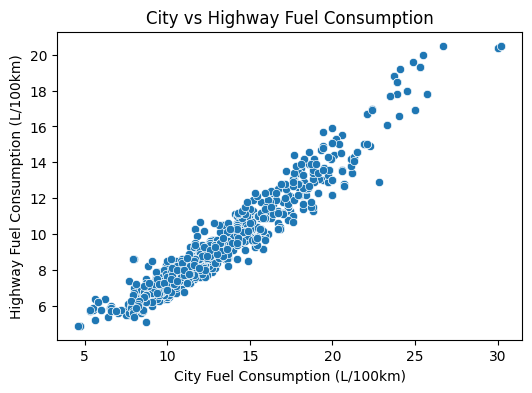

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='FUELCONSUMPTION_CITY',
    y='FUELCONSUMPTION_HWY',
    data=df
)
plt.title("City vs Highway Fuel Consumption")
plt.xlabel("City Fuel Consumption (L/100km)")
plt.ylabel("Highway Fuel Consumption (L/100km)")
plt.show()


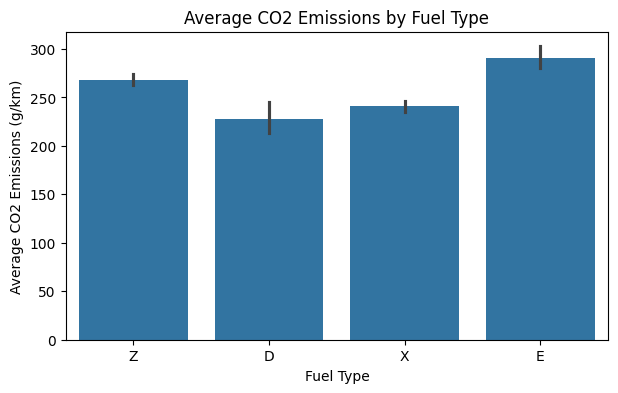

In [11]:
plt.figure(figsize=(7,4))
sns.barplot(
    x='FUELTYPE',
    y='CO2EMISSIONS',
    data=df,
    estimator='mean'
)
plt.title("Average CO2 Emissions by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average CO2 Emissions (g/km)")
plt.show()


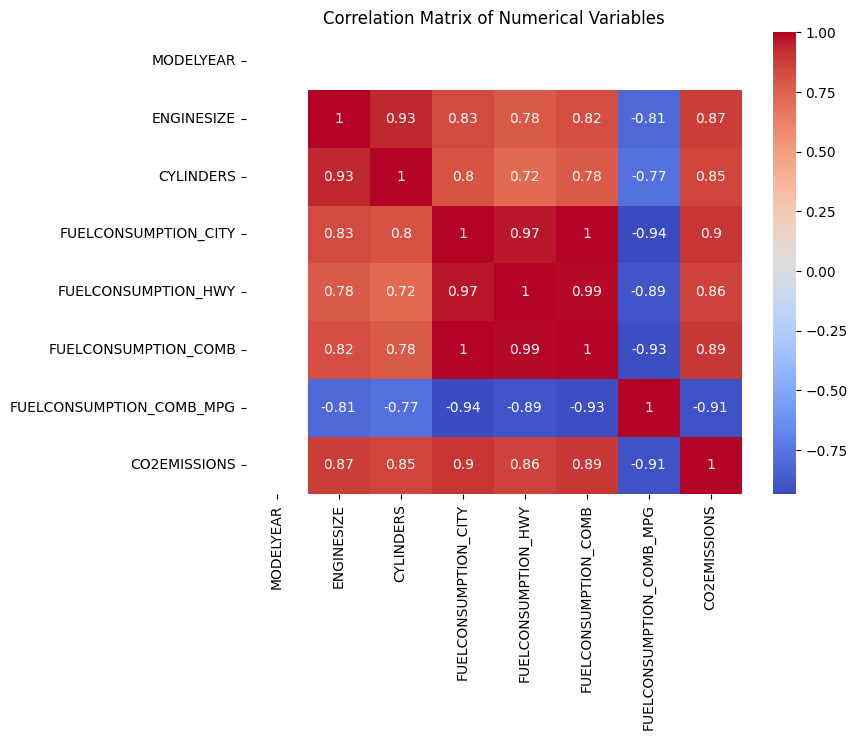

In [12]:
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


Visualisations were used to explore relationships between vehicle characteristics and emissions. Scatter plots revealed a positive relationship between engine size and CO₂ emissions, indicating that larger engines tend to consume more fuel and produce higher emissions. Bar charts showed differences in average emissions across fuel types, supporting comparisons relevant to business and environmental decision-making. A correlation heatmap was employed to identify strong numerical relationships, providing a comprehensive overview of key influencing factors.